In [ ]:
#OK

In [1]:
using Plots
using DifferentialEquations
using JuliaMBD
using JuliaMBD.Diagram

In [2]:
@model tr_f_pnt begin
    @parameter begin
        d_Fr_wheel=1825.3
        k_Fr_wheel=1.3598e+05
        z_k_Fr_wheel_ini=0.00036769
    end
    @xmlmodel("METI_Vertical_Vibration.drawio", "TR_F_PNT") 
end


┌ Warning: The port Dict{Any, Any}("label" => "<p style=\"line-height: 100%;\"><br></p>", "name" => "in4", "id" => "_D6O4RkaB_-5ke2ZZ8se-11", "parent" => "_D6O4RkaB_-5ke2ZZ8se-6", "type" => "inport") has not been used.
└ @ JuliaMBD.Diagram /root/.julia/packages/JuliaMBD/JTVej/src/diagrams/_xml2model.jl:76
┌ Warning: The port Dict{Any, Any}("label" => "<p style=\"line-height: 100%;\"><br></p>", "name" => "in3", "id" => "_D6O4RkaB_-5ke2ZZ8se-27", "parent" => "_D6O4RkaB_-5ke2ZZ8se-23", "type" => "inport") has not been used.
└ @ JuliaMBD.Diagram /root/.julia/packages/JuliaMBD/JTVej/src/diagrams/_xml2model.jl:76
┌ Warning: The port Dict{Any, Any}("label" => "<p style=\"line-height: 100%;\"><br></p>", "name" => "in4", "id" => "_D6O4RkaB_-5ke2ZZ8se-28", "parent" => "_D6O4RkaB_-5ke2ZZ8se-23", "type" => "inport") has not been used.
└ @ JuliaMBD.Diagram /root/.julia/packages/JuliaMBD/JTVej/src/diagrams/_xml2model.jl:76
┌ Warning: The port Dict{Any, Any}("label" => "<p style=\"line-height: 100%;\

tr_f_pnt (generic function with 1 method)

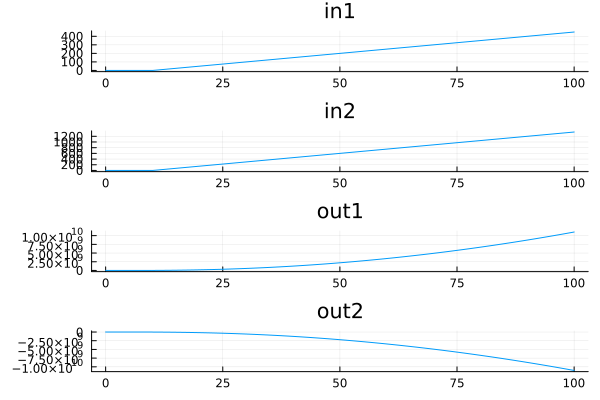

In [3]:
@model TestTr_f_pnt begin


    @block begin
        p = tr_f_pnt()
        ramp1 = Ramp(starttime=10, slope=5)
        ramp2 = Ramp(starttime=10, slope=15)
    end
    @connect begin
        ramp1.out => p.v_MUS_F2TR_F_mps
        ramp2.out => p.v_RD2TR_F_mps
    end
    @scope begin
        p.v_MUS_F2TR_F_mps => in1
        p.v_RD2TR_F_mps => in2
        p.F_TR_F2MUS_F_N => out1 
        p.F_TR_F2RD_N => out2
    end
end
m = @compile TestTr_f_pnt()
res = simulate(m, tspan=[0, 100])
plot(res)